In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install idx2numpy

import tensorflow.keras as keras
import idx2numpy
import cv2 as cv
import numpy as np
import gzip
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

train_data_path = '/content/gdrive/My Drive/data2/train-images-idx3-ubyte.gz'
test_data_path = '/content/gdrive/My Drive/data2/t10k-images-idx3-ubyte.gz'
train_label_path = '/content/gdrive/My Drive/data2/train-labels-idx1-ubyte.gz'
test_label_path = '/content/gdrive/My Drive/data2/t10k-labels-idx1-ubyte.gz'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
  Created wheel for idx2numpy: filename=idx2numpy-1.2.2-cp36-none-any.whl size=8032 sha256=2f206197aa3a3ed80c2b1d073d4e33571f23617e719886e350c11fd977339d6c
  Stored in directory: /root/.cache/pip/wheels/7a/b5/69/3e0757b3086607e95db70661798fdf98a77a0bb79c54e1f320
Successfully built idx2numpy


In [0]:
class MiniBatch_GD():

	def __init__(self):
		self.network = keras.Sequential()
		self.network.add(keras.layers.Conv2D(32, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01), activation='relu', input_shape=(28,28,1)))
		self.network.add(keras.layers.BatchNormalization())
		self.network.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
		self.network.add(keras.layers.Dropout(0.1))
		self.network.add(keras.layers.Conv2D(64, kernel_size=3, kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01), activation='relu'))
		self.network.add(keras.layers.BatchNormalization())
		self.network.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
		self.network.add(keras.layers.Dropout(0.3))
		self.network.add(keras.layers.Flatten())
		self.network.add(keras.layers.Dense(10, activation='softmax'))

	def extract_data(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(16)
			buf = f.read(28 * 28 * num_img)
			train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
			train_data = train_data.reshape(num_img, 28, 28, 1)
			return train_data

	def extract_labels(self, filepath, num_img):
		with gzip.open(filepath) as f:
			f.read(8)
			buf = f.read(num_img)
			labels= np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
			# labels = labels.reshape(num_img, 28, 28, 1)
			return labels


In [0]:
mbgd = MiniBatch_GD()

train_data = mbgd.extract_data(train_data_path, 60000)
train_labels = mbgd.extract_labels(train_label_path, 60000)
test_data = mbgd.extract_data(test_data_path, 10000)
test_labels = mbgd.extract_labels(test_label_path, 10000)

Fd =open('/content/gdrive/My Drive/data2/Network_Best_one.h5', 'w+') 
Fd.close()


In [8]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
opt = keras.optimizers.SGD(lr = 0.001 , momentum = 0.9)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10 )
cs= ModelCheckpoint(filepath='/content/gdrive/My Drive/data2/Network_Best_one.h5', monitor='val_loss', save_best_only=True)
mbgd.network.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
hist = mbgd.network.fit(train_data, train_labels, batch_size = 170, validation_data=(test_data, test_labels), epochs=300, callbacks = [es,cs])
mbgd.network.save('/content/gdrive/My Drive/data2/Network_config_two.h5')
with open('/content/gdrive/My Drive/data2/History_config_two', 'wb') as file:
  pickle.dump(hist.history, file)




Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 3s 57us/sample - loss: 1.1578 - acc: 0.7616 - val_loss: 0.8302 - val_acc: 0.8424
Epoch 2/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8403 - acc: 0.8363 - val_loss: 0.7606 - val_acc: 0.8515
Epoch 3/300
60000/60000 [==============================] - 3s 48us/sample - loss: 0.7418 - acc: 0.8499 - val_loss: 0.6776 - val_acc: 0.8650
Epoch 4/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6666 - acc: 0.8627 - val_loss: 0.6331 - val_acc: 0.8657
Epoch 5/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.6108 - acc: 0.8701 - val_loss: 0.5684 - val_acc: 0.8800
Epoch 6/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5624 - acc: 0.8764 - val_loss: 0.5355 - val_acc: 0.8794
Epoch 7/300
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5182 - acc: 0.8799 - val_l

OUTPUT FROM BEST MODEL
10000/10000 - 1s - loss: 0.2939 - acc: 0.9098


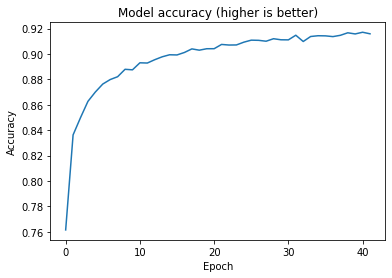

In [9]:

print("OUTPUT FROM BEST MODEL")
#Bestmodel = MiniBatch_GD()
mbgd.network.load_weights('/content/gdrive/My Drive/data2/Network_Best_one.h5')
oss, acc = mbgd.network.evaluate(test_data,  test_labels, verbose=2)






import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()